# Website

https://www.kaggle.com/datasets/dileep070/heost-disease-prediction-using-logistic-regression?resource=download

In [65]:
import pandas as pd
import numpy as np
import os

In [66]:
dt = pd.read_csv('framingham.csv')

In [67]:
dt.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [68]:
dt.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [69]:
dt.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [70]:
# check for missing values for row
mis_value = dt.isnull().any(axis=1)
dt[mis_value]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [71]:
# or can print by
mis_value

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235     True
4236     True
4237    False
Length: 4238, dtype: bool

In [72]:
# counts missing value per row
miss_count = dt.isnull().sum(axis=1)
miss_count

0       0
1       0
2       0
3       0
4       0
       ..
4233    0
4234    0
4235    1
4236    1
4237    0
Length: 4238, dtype: int64

In [73]:
# check missing value for each column

miss_val = dt.isnull().any()
miss_val
print("Missing values count per column:")
print(miss_val)

Missing values count per column:
male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool


In [74]:
# counts it
miss_val = dt.isnull().sum()
miss_val
print("Missing values count per column:")
print(miss_val)

Missing values count per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [75]:
# drops all rows with missing values
dt_cleaned = dt.dropna()

In [76]:
# rechecking
miss_val_check = dt_cleaned.isnull().sum()

print("Checking if it cleaned the data:")
print(miss_val_check)

Checking if it cleaned the data:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [77]:
# Saves original dataset 
dt = dt.dropna()

In [78]:
dt.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [79]:
from sklearn import linear_model

In [80]:
help(linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - A variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _glm (package)
    _huber
    _least_angle
    _linear_loss
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _quantile
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin, sklearn.utils._metadata_requests._MetadataRequester)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
            sklearn.linear_model._logistic.LogisticRegressionCV(skle

In [81]:
# for linear regression

import matplotlib.pyplot as plt
from scipy import stats

<function matplotlib.pyplot.show(close=None, block=None)>

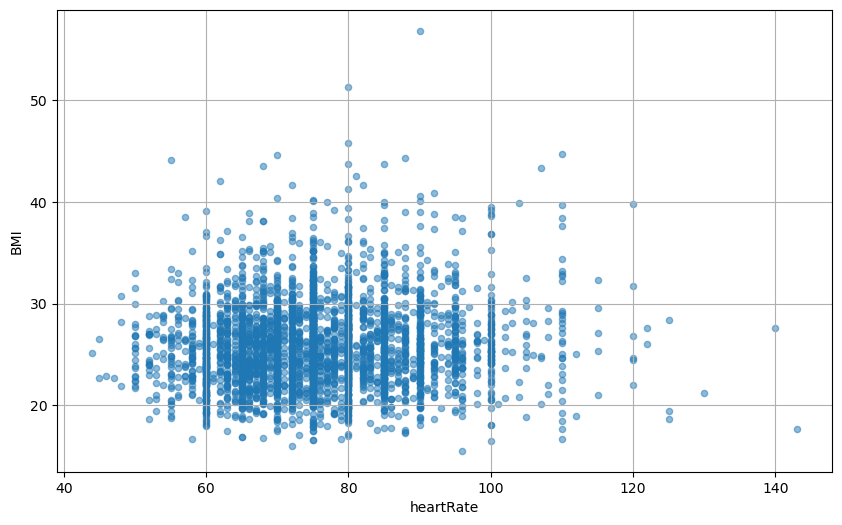

In [82]:
dt.plot(kind = 'scatter',
        x = 'heartRate',
        y = 'BMI',
        alpha = 0.5,
        figsize = (10,6)
)

plt.grid(True)
plt.show

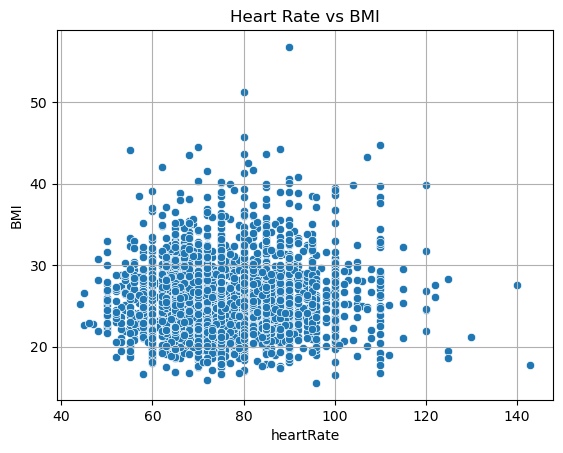

In [83]:
# can use seaborn

import seaborn as sns
sns.scatterplot(data = dt,
               x = 'heartRate',
               y = 'BMI')

plt.title("Heart Rate vs BMI")
plt.grid(True)
plt.show()

## Train regression model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = dt.drop('BMI', axis = 1), dt.heartRate # it makes everything BUT heartRate on the x-axis

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [87]:
reg.score(X_test, y_test) # Similar to R squared

0.9988672859190019

In [88]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9988672859190019
MAE: 0.028620218579234948
MSE: 0.1563288251366118
RMSE: 0.39538440173660344


Text(0.5, 1.0, 'Prediction VS. Actual Heart Rate')

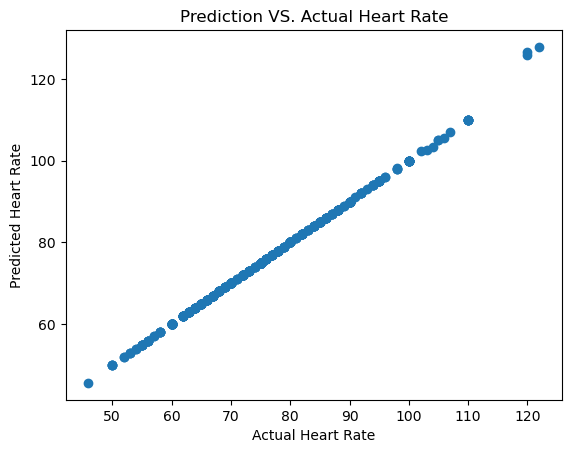

In [89]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Prediction VS. Actual Heart Rate')

In [90]:
dt.BMI.describe()

count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [91]:
# Features that are most relevant

importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)

sorted_importances[:5] # the 5 shows the 5 most important features. If you want to show the importance of all the featuers then you remove the "[:5]"


[('heartRate', 0.999162955643241),
 ('age', 0.0004973992172423644),
 ('glucose', 8.995471619796628e-05),
 ('totChol', 8.68031006635485e-05),
 ('sysBP', 5.89669632268115e-05)]

<BarContainer object of 10 artists>

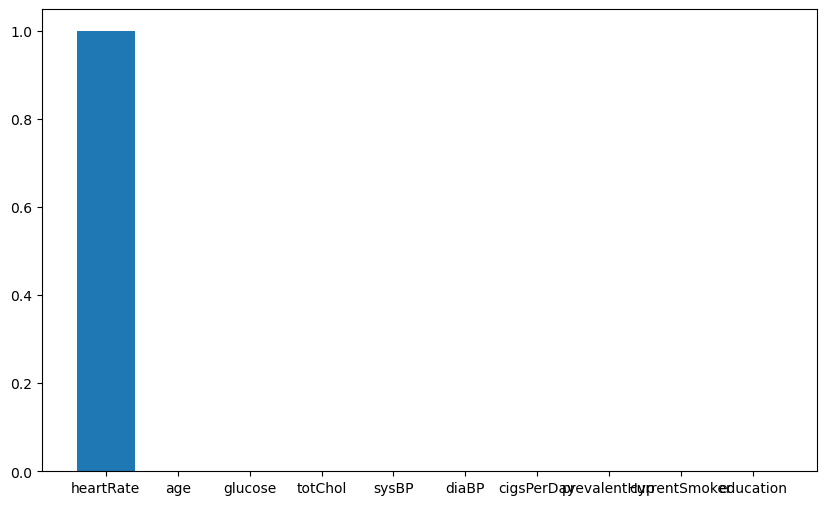

In [92]:
plt.figure(figsize = (10, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [93]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs = -1)

# Paramater 1: Values - A, B, C
# Param 2: Value - X, Y, Z
param_grid = {
    'n_estimators': [100, 2000, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'log2', 'sqrt']
}

reg = RandomForestRegressor(n_jobs = -1)

random_search = RandomizedSearchCV(estimator = reg,
                                  param_distributions = param_dist,
                                  n_iter = 2,
                                  cv = 3,
                                  scoring = 'neg_mean_squared_error',
                                  verbose = 2,
                                  random_state = 10,
                                  n_jobs = -1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [95]:
best_regressor.score(X_test, y_test)

0.9998560588896869

In [96]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9998560588896869
MAE: 0.012868468973351966
MSE: 0.019865688121649447
RMSE: 0.14094569210035987
